##### Import nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt, iirnotch
from io import StringIO

##### On charge toutes les données des sujets sains 

In [6]:
file_path1 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/1Nmar.txt'
file_path2 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/2Nmar.txt'
file_path3 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/3Nmar.txt'
file_path4 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/4Nmar.txt'
file_path5 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/5Nmar.txt'
file_path6 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/6Nmar.txt'
file_path7 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/7Nmar.txt'
file_path8 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/8Nmar.txt'
file_path9 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/9Nmar.txt'
file_path10 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/10Nmar.txt'
file_path11 = 'emg+dataset+in+lower+limb/SEMG_DB1/N_TXT/11Nmar.txt'


def load_and_process_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        content = '\n'.join(content.split('\n')[6:])
    
    data = pd.read_csv(StringIO(content), sep='\t', header=None, names=['RF', 'BF', 'VM', 'ST', 'FX'])
    data.dropna(inplace=True)
    data['Time'] = data.index
    return data

#Filtre passe-bande
def bandpass_filter(data, lowcut=20, highcut=450, fs=1000, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

#Filtre notch
def notch_filter(data, notch_freq=50, fs=1000, quality_factor=30):
    nyquist = 0.5 * fs
    freq = notch_freq / nyquist
    b, a = iirnotch(freq, quality_factor)
    return filtfilt(b, a, data)


data1 = load_and_process_data(file_path1)
data2 = load_and_process_data(file_path2)
data3 = load_and_process_data(file_path3)
data4 = load_and_process_data(file_path4)
data5 = load_and_process_data(file_path5)
data6 = load_and_process_data(file_path6)
data7 = load_and_process_data(file_path7)
data8 = load_and_process_data(file_path8)
data9 = load_and_process_data(file_path9)
data10 = load_and_process_data(file_path10)
data11 = load_and_process_data(file_path11)

print(data1.head())


       RF      BF      VM      ST    FX  Time
0  0.0007 -0.0083  0.0045 -0.0091  57.6     0
1 -0.0008 -0.0038  0.0007 -0.0046  57.5     1
2 -0.0008 -0.0068  0.0015 -0.0023  57.3     2
3 -0.0008 -0.0053  0.0045 -0.0038  57.1     3
4  0.0007  0.0015  0.0082 -0.0075  56.9     4


##### Détection des pics pour chaque cycle

Nombre de pics détectés : 4
[1144 2380 3649 4930]
Longueur moyenne des cycles : 1262.0
Nombre de débuts de cycles ajustés : 5
[261, 1497, 2766, 4047, 5309.0]
Nombre de pics détectés : 5
[1260 2477 3762 5220 6520]
Longueur moyenne des cycles : 1315.0
Nombre de débuts de cycles ajustés : 6
[340, 1557, 2842, 4300, 5600, 6915.0]
Nombre de pics détectés : 18
[  69  139  962 1059 1483 2351 2861 3761 3879 4388 5244 5319 5525 5612
 5796 6483 6666 6861]
Longueur moyenne des cycles : 399.52941176470586
Nombre de débuts de cycles ajustés : 18
[0, 0, 683, 780, 1204, 2072, 2582, 3482, 3600, 4109, 4965, 5040, 5246, 5333, 5517, 6204, 6387, 6582]
Nombre de pics détectés : 22
[ 330  421  561  862 1084 1960 2180 2617 3442 3540 3662 4091 4901 4977
 5120 5205 5549 6323 6420 6562 6664 6966]
Longueur moyenne des cycles : 316.0
Nombre de débuts de cycles ajustés : 24
[109, 200, 340, 641, 863, 1739, 1959, 2396, 3221, 3319, 3441, 3870, 4680, 4756, 4899, 4984, 5328, 6102, 6199, 6341, 6443, 6745, 7061.0, 7377.0]

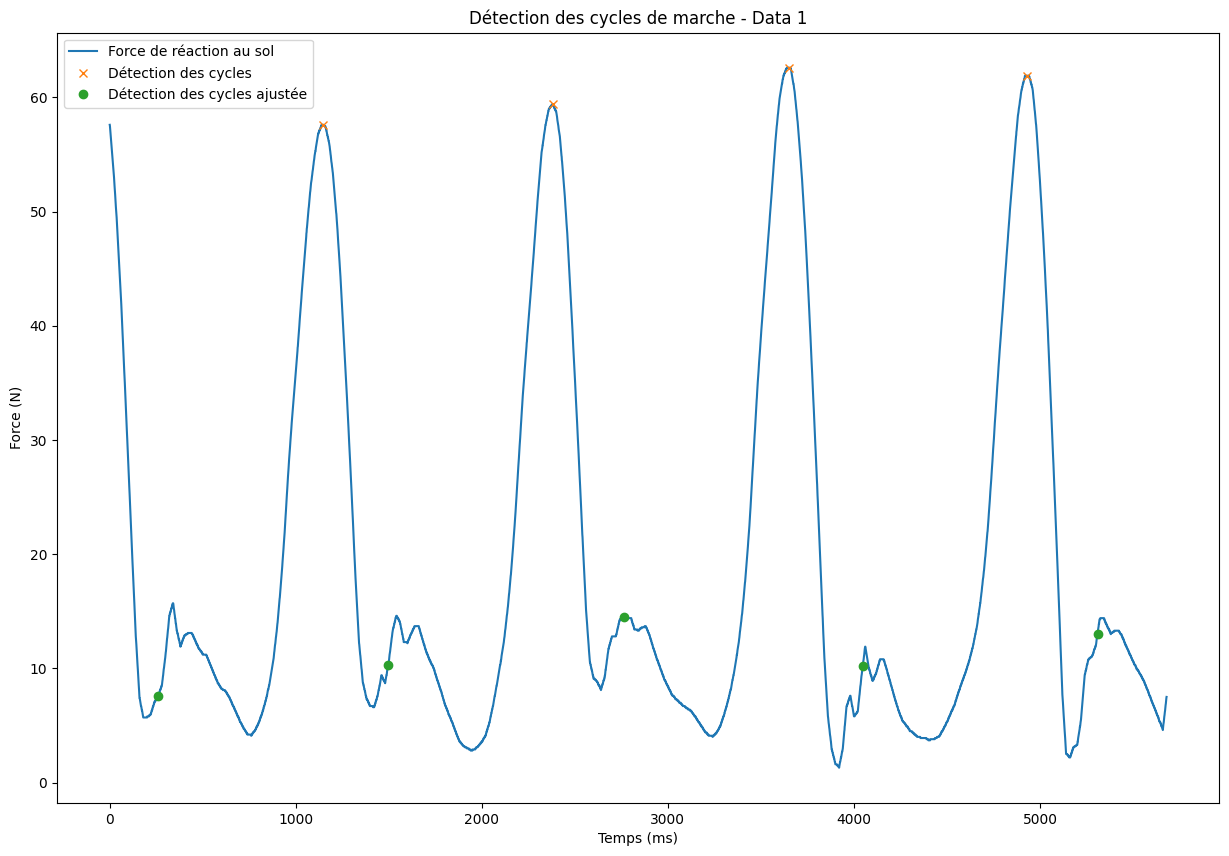

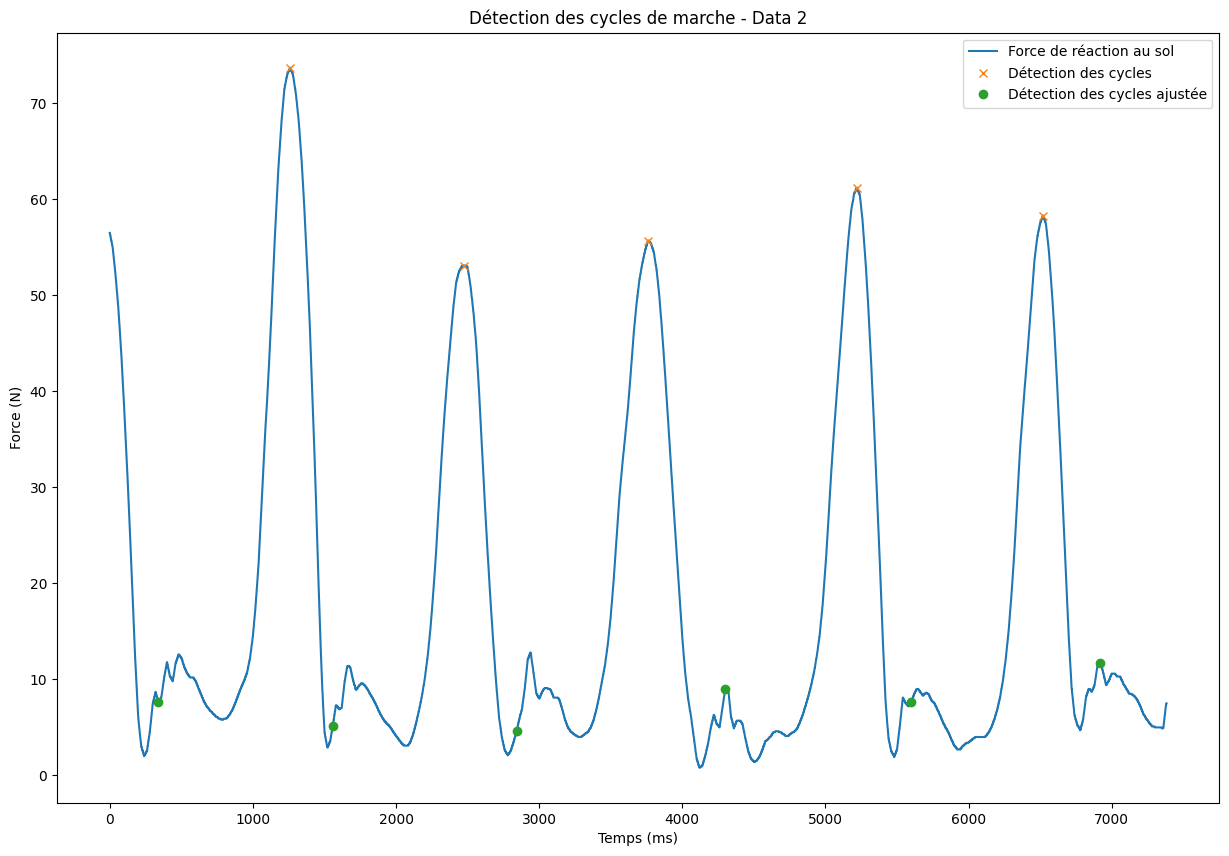

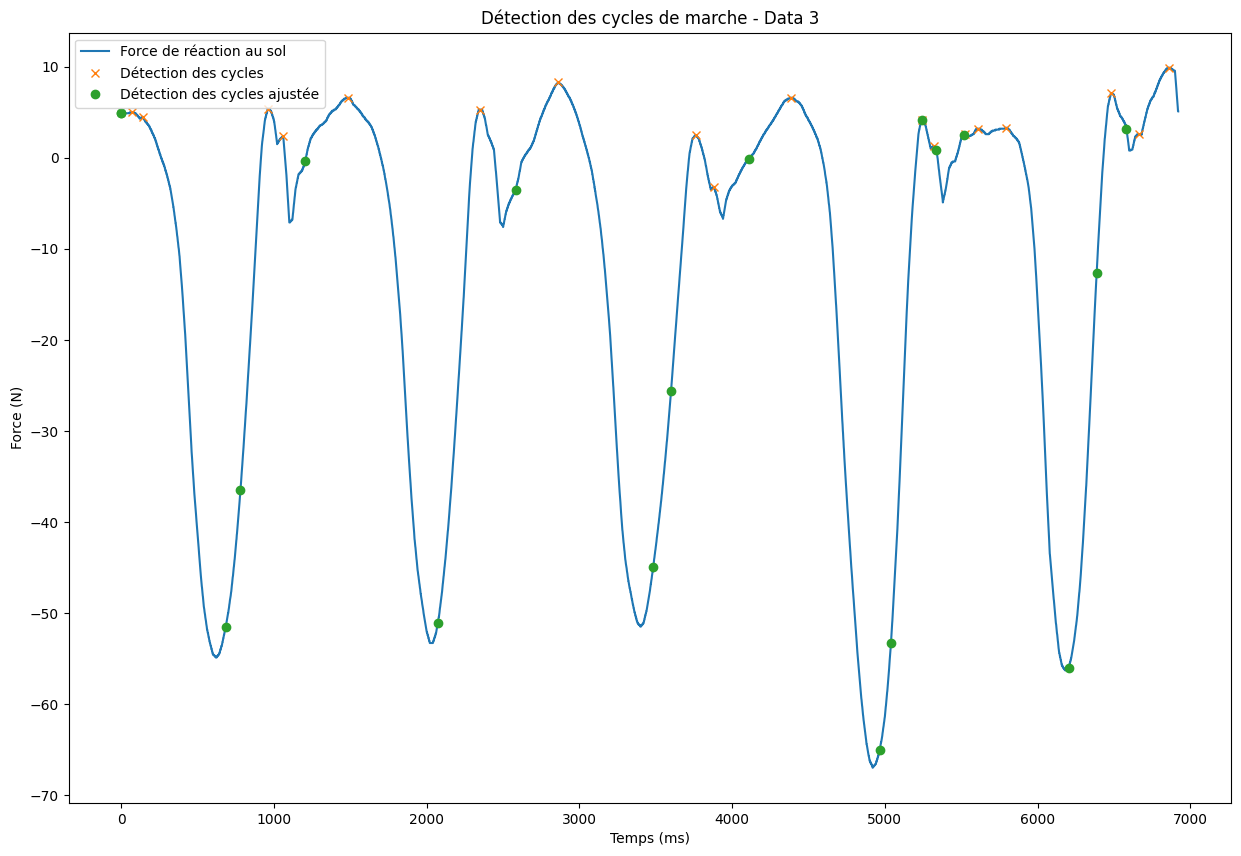

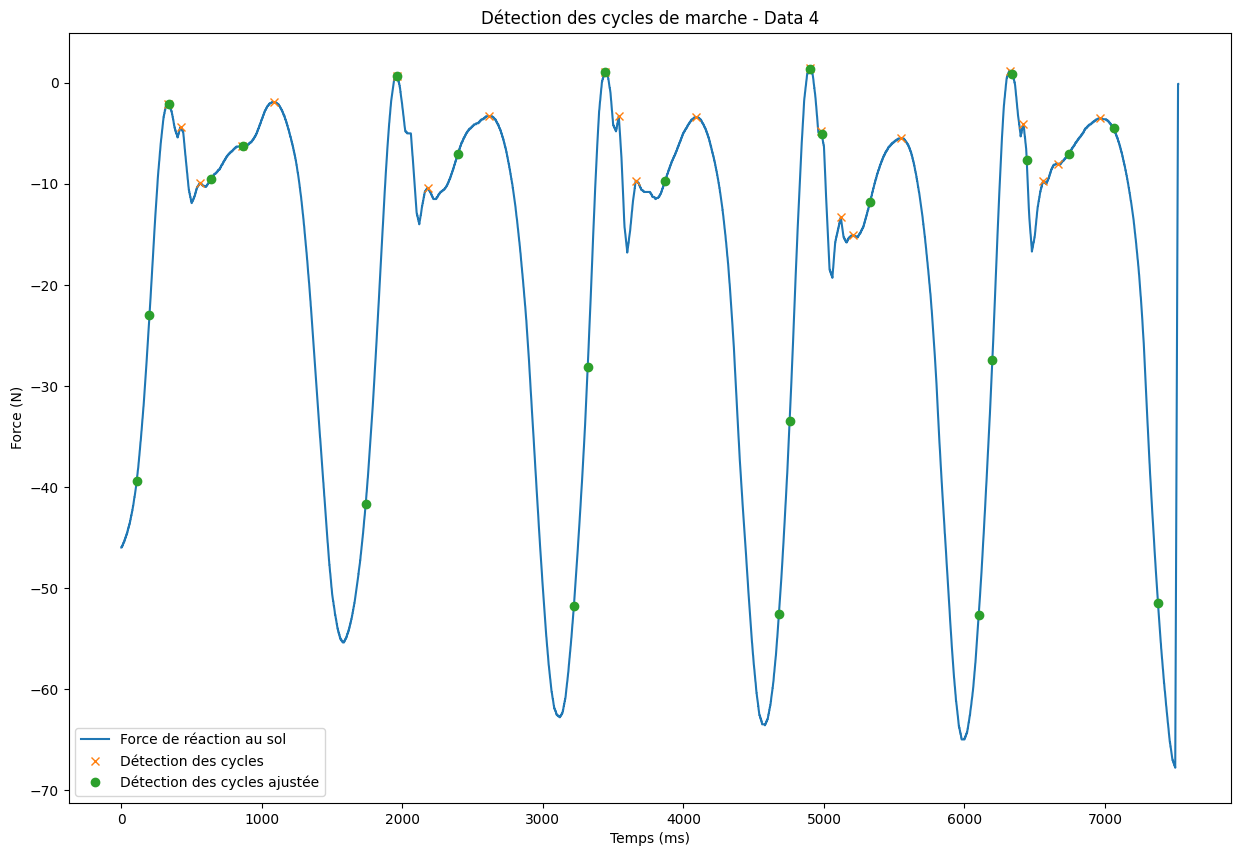

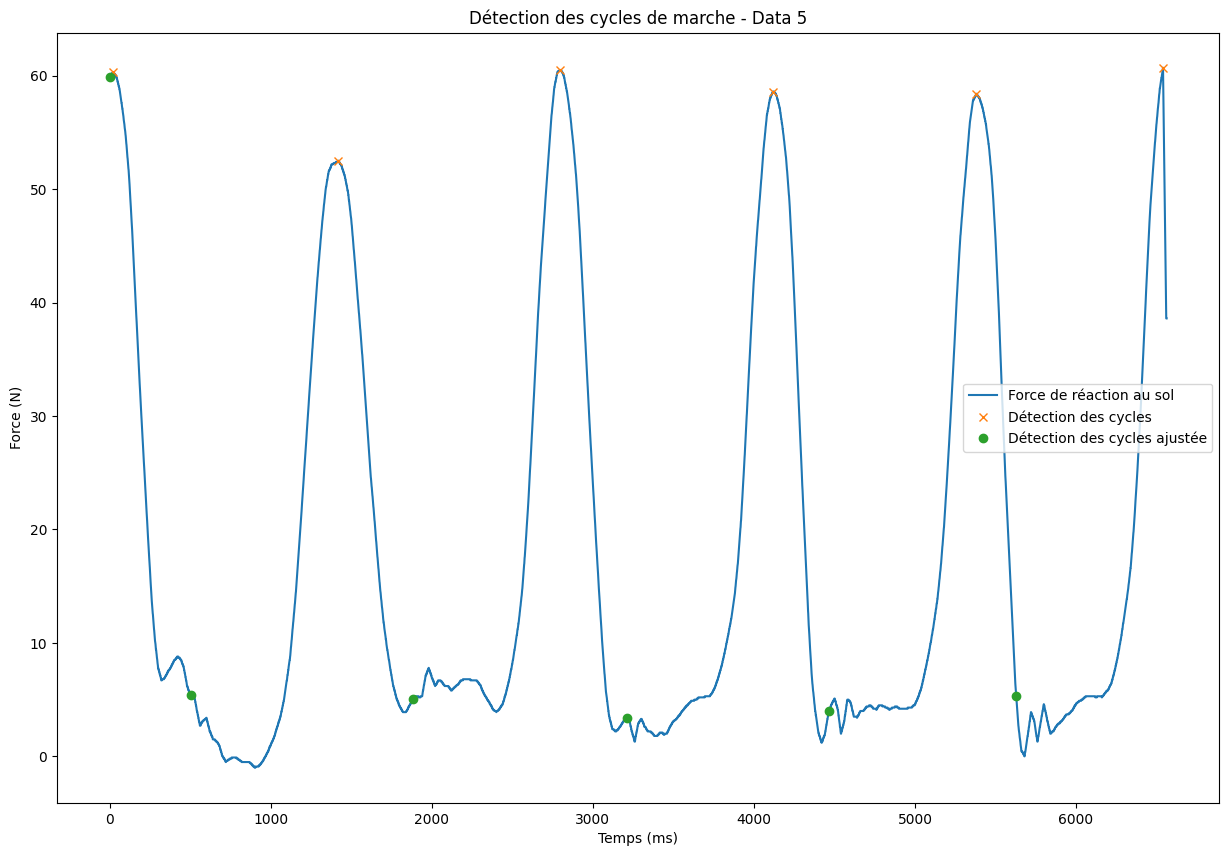

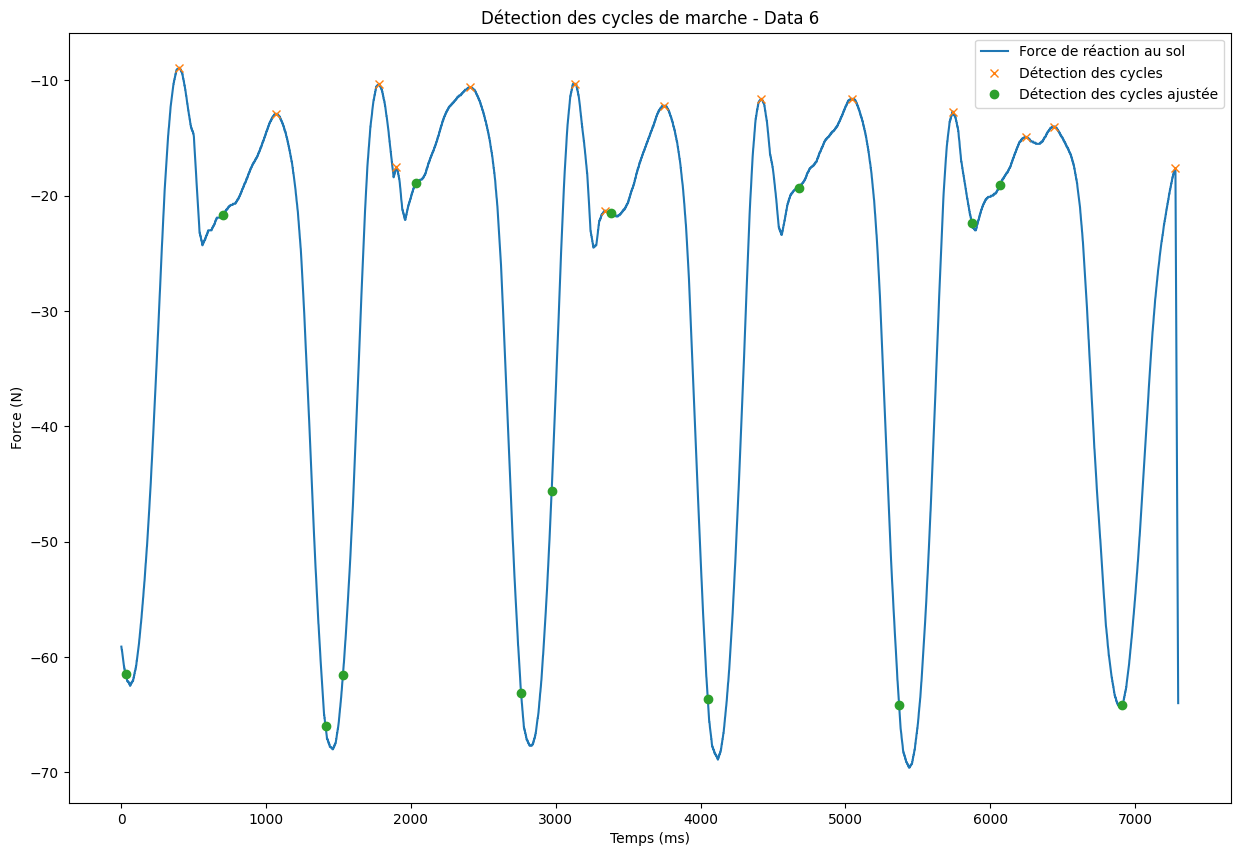

KeyError: '[7339.778877887788, 7360.557755775577, 7381.336633663365, 7402.115511551154, 7422.894389438942, 7443.673267326731, 7464.452145214519, 7485.2310231023075, 7506.009900990096, 7526.788778877884, 7547.567656765673, 7568.346534653461, 7589.12541254125, 7609.904290429038, 7630.683168316827, 7651.462046204615, 7672.2409240924035, 7693.019801980192, 7713.79867986798, 7734.577557755769, 7755.356435643557, 7776.135313531346, 7796.914191419134, 7817.693069306923, 7838.471947194711, 7859.250825082499, 7880.029702970288, 7900.808580858076, 7921.587458745865, 7942.366336633653, 7963.145214521442, 7983.92409240923, 8004.7029702970185, 8025.481848184807, 8046.260726072595, 8067.039603960384, 8087.818481848172, 8108.597359735961, 8129.376237623749] not in index'

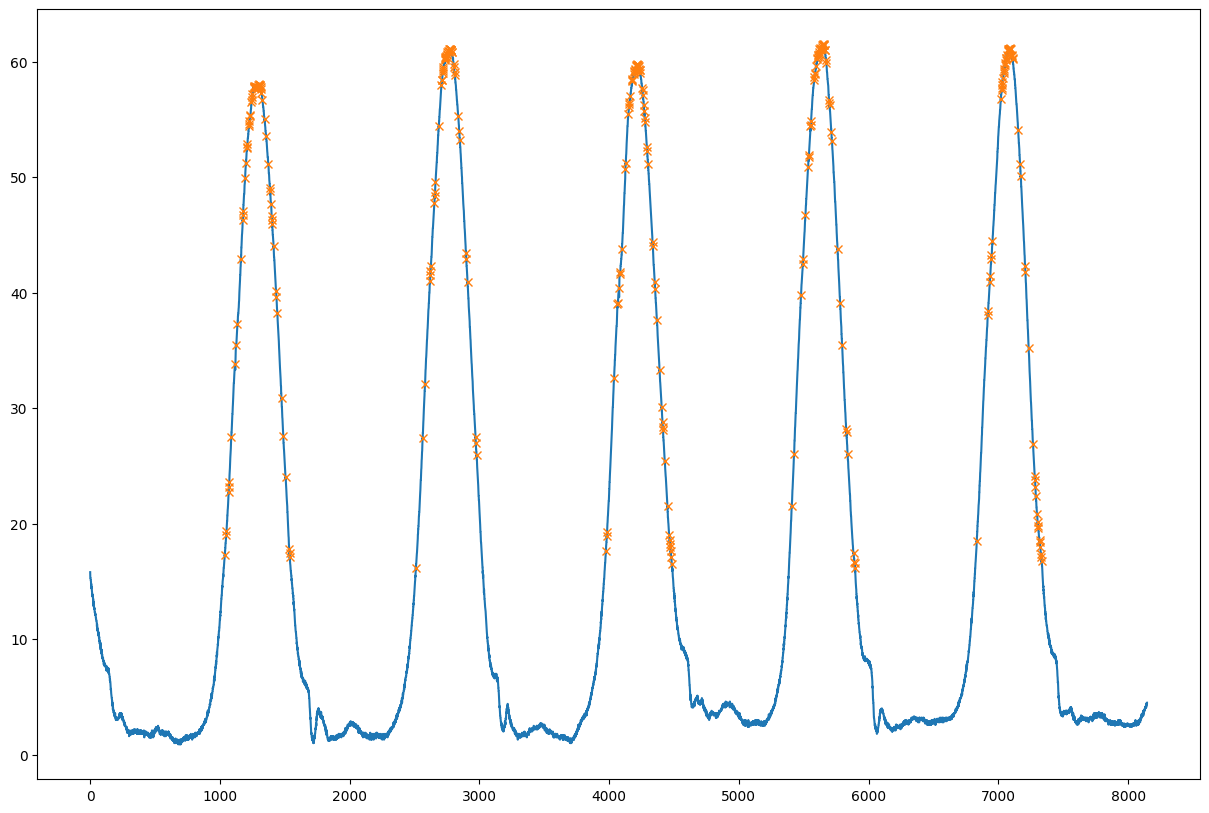

In [7]:
def detect_cycles(data):
    # Détection des pics pour identifier les cycles de marche
    peaks, _ = find_peaks(data['FX'], height=np.mean(data['FX']))
    print(f'Nombre de pics détectés : {len(peaks)}')
    print(peaks)

    # On détermine la durée d'un cycle moyen
    cycle_lengths = np.diff(peaks)
    mean_cycle_length = np.mean(cycle_lengths)
    print(f'Longueur moyenne des cycles : {mean_cycle_length}')

    # Décalage des cycles pour que le pic soit à 70%
    shift_ratio = 0.7
    adjusted_peaks = []

    for i in range(len(peaks)):
        shift_amount = int(mean_cycle_length * shift_ratio)
        adjusted_start = max(0, peaks[i] - shift_amount)  # Éviter les index négatifs
        adjusted_peaks.append(adjusted_start)

    # Vérification des cycles estimés en l'absence d'un pic
    while adjusted_peaks[-1] + mean_cycle_length < len(data):
        new_cycle_start = adjusted_peaks[-1] + mean_cycle_length
        adjusted_peaks.append(new_cycle_start)

    print(f'Nombre de débuts de cycles ajustés : {len(adjusted_peaks)}')
    print(adjusted_peaks)

    return peaks, adjusted_peaks, mean_cycle_length

# Apply the detect_cycles function to each dataset
peaks1, adjusted_peaks1, mean_cycle_length1 = detect_cycles(data1)
peaks2, adjusted_peaks2, mean_cycle_length2 = detect_cycles(data2)
peaks3, adjusted_peaks3, mean_cycle_length3 = detect_cycles(data3)
peaks4, adjusted_peaks4, mean_cycle_length4 = detect_cycles(data4)
peaks5, adjusted_peaks5, mean_cycle_length5 = detect_cycles(data5)
peaks6, adjusted_peaks6, mean_cycle_length6 = detect_cycles(data6)
peaks7, adjusted_peaks7, mean_cycle_length7 = detect_cycles(data7)
peaks8, adjusted_peaks8, mean_cycle_length8 = detect_cycles(data8)
peaks9, adjusted_peaks9, mean_cycle_length9 = detect_cycles(data9)
peaks10, adjusted_peaks10, mean_cycle_length10 = detect_cycles(data10)
peaks11, adjusted_peaks11, mean_cycle_length11 = detect_cycles(data11)

def plot_detected_cycles(data, peaks, adjusted_peaks, title):
    plt.figure(figsize=(15, 10))
    plt.plot(data['Time'], data['FX'], label='Force de réaction au sol')
    plt.plot(data['Time'][peaks], data['FX'][peaks], 'x', label='Détection des cycles')
    plt.plot(data['Time'][adjusted_peaks], data['FX'][adjusted_peaks], 'o', label='Détection des cycles ajustée')
    plt.xlabel('Temps (ms)')
    plt.ylabel('Force (N)')
    plt.title(title)
    plt.legend()
    plt.show()

# Apply the function to each dataset
plot_detected_cycles(data1, peaks1, adjusted_peaks1, 'Détection des cycles de marche - Data 1')
plot_detected_cycles(data2, peaks2, adjusted_peaks2, 'Détection des cycles de marche - Data 2')
plot_detected_cycles(data3, peaks3, adjusted_peaks3, 'Détection des cycles de marche - Data 3')
plot_detected_cycles(data4, peaks4, adjusted_peaks4, 'Détection des cycles de marche - Data 4')
plot_detected_cycles(data5, peaks5, adjusted_peaks5, 'Détection des cycles de marche - Data 5')
plot_detected_cycles(data6, peaks6, adjusted_peaks6, 'Détection des cycles de marche - Data 6')
plot_detected_cycles(data7, peaks7, adjusted_peaks7, 'Détection des cycles de marche - Data 7')
plot_detected_cycles(data8, peaks8, adjusted_peaks8, 'Détection des cycles de marche - Data 8')
plot_detected_cycles(data9, peaks9, adjusted_peaks9, 'Détection des cycles de marche - Data 9')
plot_detected_cycles(data10, peaks10, adjusted_peaks10, 'Détection des cycles de marche - Data 10')
plot_detected_cycles(data11, peaks11, adjusted_peaks11, 'Détection des cycles de marche - Data 11')